In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib notebook

In [17]:
path = './Susceptibilities/'

suscepC = np.load(path+'suscepC.npy')
NC = np.load(path+'NC.npy')


suscepA = np.load(path+'suscepA.npy')
NA = np.load(path+'NA.npy')

omega = np.load(path+'omega.npy')
parameters = pd.read_csv(path+'parameters.txt',index_col=0)


path = './RespFunctions/'

respC = np.load(path+'respC.npy')
respA = np.load(path+'respA.npy')

time = np.load(path+'time.npy')

In [9]:
GcR = [np.real(suscepC[i,:]) for i in range(suscepC.shape[0])]
GcI = [np.imag(suscepC[i,:]) for i in range(suscepC.shape[0])]

GaR = [np.real(suscepA[i,:]) for i in range(suscepA.shape[0])]
GaI = [np.imag(suscepA[i,:]) for i in range(suscepA.shape[0])]

<IPython.core.display.Javascript object>


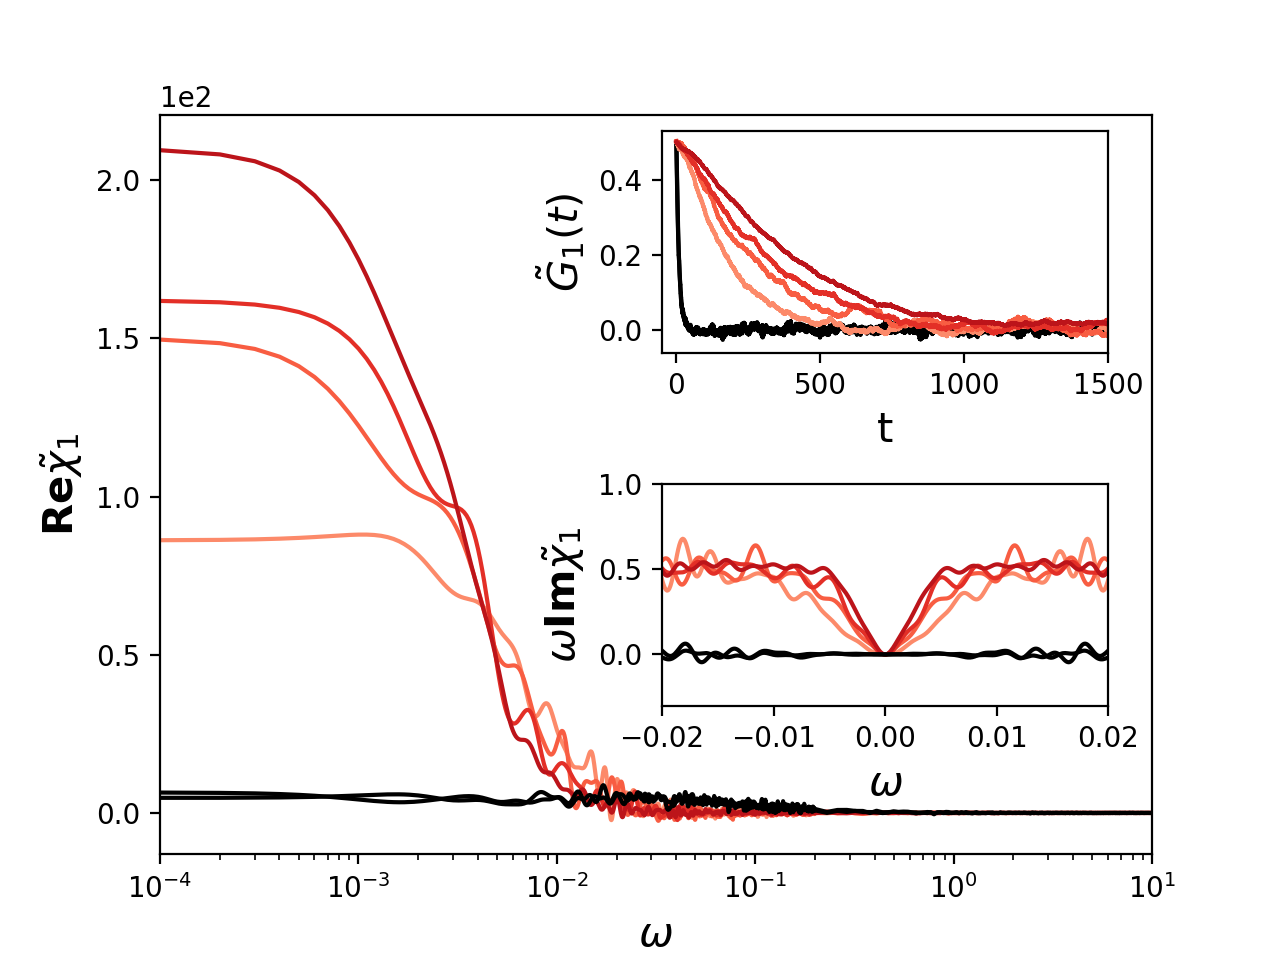

Text(0, 0.5, '$ \\omega \\mathbf{Im}\\tilde{\\chi}_1 $')

In [10]:
reds = cm.get_cmap('Reds')
colors = reds(np.linspace(0.4,0.8,len(GcR)))

plt.figure()
for i in range(len(GcR)):
    plt.plot(omega,GcR[i],color=colors[i])
    
for i in range(len(GaR)):
    plt.plot(omega,GaR[i],'k')
plt.xlabel('$\omega$',size=15)
plt.ylabel('$\\mathbf{Re} \\tilde{\chi}_1$',size=15)
plt.xlim(10**(-4),10)

ax = plt.gca()
ax.set_xscale('log')

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

axin = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(0.52,0.66,0.45,0.3),
                   bbox_transform=ax.transAxes, loc=4)
for i in range(respA.shape[0]):
    axin.plot(time,respA[i,:],color='k',)
    
    
for i in range(respC.shape[0]):
    axin.plot(time,respC[i,:],color=colors[i])
axin.set_xlabel('t',size=15)
axin.set_ylabel('$\\tilde{G}_1(t)$',size=15)
axin.set_xlim(-50,1500)


axin = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(0.52,0.22,0.45,0.3),
                   bbox_transform=ax.transAxes)

for i in range(len(GcI)):
    axin.plot(omega,omega*GcI[i],color=colors[i])
    
for i in range(len(GaI)):
    axin.plot(omega,omega*GaI[i],color='k')
    
axin.set_xlim(-0.02,0.02)
axin.set_ylim(-0.3,1)
axin.set_xlabel('$\omega$',size=15)
axin.set_ylabel('$ \omega \\mathbf{Im}\\tilde{\chi}_1 $',size=15)

In [21]:
parameters.iloc[0,-4:]

sim6     103900.0
sim12     46700.0
sim24     34500.0
sim48     53070.0
Name: 0, dtype: float64